# PYTHON PACKAGES IMPORT

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

from sklearn import metrics

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold, KFold

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC

from sklearn.naive_bayes import GaussianNB

from sklearn.neural_network import MLPClassifier

import lightgbm as lgb

# DATASET IMPORT

In [2]:
df = pd.read_csv('Sentinel_2.csv')
display(df)

,Blue,Green,Red,VRE1,VRE2,VRE3,NIR,SWIR1,SWIR2,NDVI,...,EVI,SAVI,NDMI,MSI,NBRI,BSI,NDWI,ARVI,SIPI,Label
0,0.343750,0.285714,0.312500,0.250000,0.339286,0.347222,0.363636,0.354167,0.377778,0.593744,...,0.730366,0.596619,0.549196,0.422650,0.540873,0.310542,0.362746,0.592950,0.393942,0
1,0.312500,0.257143,0.416667,0.333333,0.232143,0.222222,0.204545,0.409722,0.518519,0.326919,...,0.505021,0.327011,0.306424,0.684651,0.302727,0.303334,0.459418,0.305046,0.778388,0
2,0.250000,0.228571,0.354167,0.375000,0.303571,0.333333,0.352273,0.486111,0.525926,0.539529,...,0.751202,0.541906,0.381439,0.592315,0.398337,0.379622,0.296284,0.500241,0.507173,0
3,1.000000,0.971429,0.687500,0.687500,1.000000,0.944444,0.863636,0.229167,0.251852,0.584627,...,0.344354,0.588600,0.487632,0.068823,0.904945,0.569770,0.637515,0.638908,0.283333,0
4,0.492849,0.857143,0.604167,0.520833,0.553571,0.527778,0.465909,0.298611,0.259259,0.402276,...,0.325413,0.403707,0.724288,0.285088,0.741051,0.458558,0.840065,0.513761,0.257802,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28447,0.718750,0.657143,0.708333,0.500000,0.214286,0.208333,0.170455,0.444444,0.600000,0.017982,...,0.250996,0.015263,0.227058,0.796859,0.219139,0.420106,0.493426,0.126893,0.494843,0
28448,0.250000,0.171429,0.020833,0.000000,0.321429,0.430556,0.409091,0.111111,0.096296,0.993803,...,0.468493,0.999978,0.487632,0.112047,0.989685,0.114574,0.185514,0.497558,0.196154,0
28449,0.625000,0.600000,0.437500,0.416667,0.285714,0.263889,0.227273,0.270833,0.370370,0.331032,...,0.391383,0.331230,0.520796,0.448370,0.455555,0.274244,0.864535,0.408838,0.457692,1
28450,0.437500,0.428571,0.354167,0.437500,0.767857,0.736111,0.750000,0.298611,0.259259,0.781223,...,0.695098,0.787009,0.938651,0.154138,0.859580,0.433677,0.296284,0.806074,0.296047,0


# ----- MODELS IMPLEMENTATIONS -----

## Seperate Label from Dataframe

In [3]:
# Count Label type
df.value_counts('Label')

Label
0    14226
1    14226
Name: count, dtype: int64

In [4]:
X = df.iloc[:, 0:len(df.columns)-1].values ## Training Data
Y = df.iloc[:, len(df.columns)-1].values ## Label

## Spilt Train & Test Data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.90, random_state=42)

print(f'X_train Shape: {X_train.shape}\nX_test Shape: {X_test.shape}\ny_train Shape: {y_train.shape}\ny_test Shape:{y_test.shape}\n')

X_train Shape: (2845, 20)
X_test Shape: (25607, 20)
y_train Shape: (2845,)
y_test Shape:(25607,)



## Model Deployment

In [6]:
scores = []
models = []

# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=9, metric = 'euclidean')
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn_acc = accuracy_score(y_pred_knn, y_test)
scores.append(knn_acc)
models.append(knn)

# Random Forest
rf = RandomForestClassifier(n_estimators = 100, max_depth = 10, random_state = 42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_acc = accuracy_score(y_pred_rf, y_test)
scores.append(rf_acc)
models.append(rf)

# Light GBM
lgbm = lgb.LGBMClassifier()
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)
lgbm_acc = accuracy_score(y_pred_lgbm, y_test)
scores.append(lgbm_acc)
models.append(lgbm)

# Support Vector Machine
svm = SVC(C=4, gamma='auto')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
svm_acc = accuracy_score(y_pred_svm, y_test)
scores.append(svm_acc)
models.append(svm)

# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
gnb_acc = accuracy_score(y_pred_gnb, y_test)
scores.append(gnb_acc)
models.append(gnb)

# Multi-Layer Perceptron(MLP)
mlp = MLPClassifier(hidden_layer_sizes=(30), activation='relu')
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
mlp_acc = accuracy_score(y_pred_mlp, y_test)
scores.append(mlp_acc)
models.append(mlp)

[LightGBM] [Info] Number of positive: 1426, number of negative: 1419
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030421 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3415
[LightGBM] [Info] Number of data points in the train set: 2845, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501230 -> initscore=0.004921
[LightGBM] [Info] Start training from score 0.004921


C:\Users\SIRIP\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Print Accuracy

KNN accuracy score: 0.8443
Random Forest accuracy score: 0.8547
Light GBM accuracy score: 0.8513
Support Vector Machine accuracy score: 0.8511
Gaussian Naive Bayes accuracy score: 0.8348
Multi-Layer Perceptron (MLP) accuracy score: 0.8505


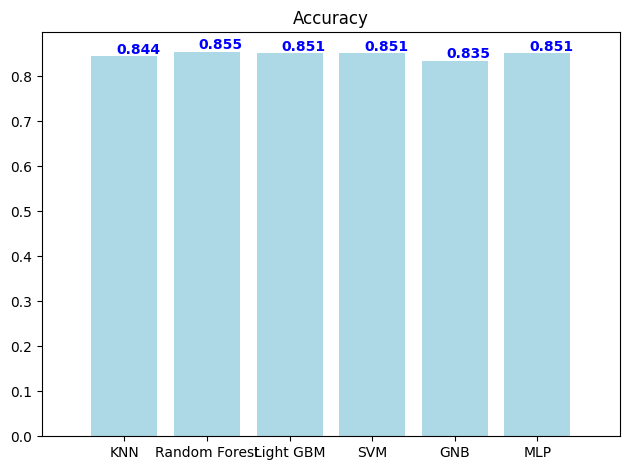

In [7]:
print('KNN accuracy score: {0:0.4f}'.format(accuracy_score(y_pred_knn, y_test)))
print('Random Forest accuracy score: {0:0.4f}'.format(accuracy_score(y_pred_rf, y_test)))
print('Light GBM accuracy score: {0:0.4f}'.format(accuracy_score(y_pred_lgbm, y_test)))
print('Support Vector Machine accuracy score: {0:0.4f}'.format(accuracy_score(y_pred_svm, y_test)))
print('Gaussian Naive Bayes accuracy score: {0:0.4f}'.format(accuracy_score(y_pred_gnb, y_test)))
print('Multi-Layer Perceptron (MLP) accuracy score: {0:0.4f}'.format(accuracy_score(y_pred_mlp, y_test)))

plt.title('Accuracy')
no_of_models = len(scores)
model_labels = ['KNN', 'Random Forest', 'Light GBM', 'SVM', 'GNB', 'MLP']
plt.bar(range(no_of_models), scores, color='lightblue', align='center')
plt.xticks(range(no_of_models), model_labels)#, rotation=45)
plt.xlim([-1, no_of_models])

# set individual bar lables with accuracy value
for i, v in enumerate(scores):
    plt.text(i-0.1, v+0.005, str(round(v,3)), color='Blue', fontweight='bold')
    
plt.tight_layout()
plt.show()

## Precision, Recall and F-1 Score

In [8]:
y_preds = {
    'KNN': y_pred_knn,
    'Random Forest': y_pred_rf,
    'SVM': y_pred_svm,
    'Gaussian NB': y_pred_gnb,
    'Light GBM': y_pred_lgbm,
    'MLP': y_pred_mlp
}

for name, y_pred in y_preds.items():
    report = classification_report(y_test, y_pred, output_dict=False)
    print(f"\n{name} Classification report: \n{report}")


KNN Classification report: 
              precision    recall  f1-score   support

           0       0.91      0.77      0.83     12807
           1       0.80      0.92      0.86     12800

    accuracy                           0.84     25607
   macro avg       0.85      0.84      0.84     25607
weighted avg       0.85      0.84      0.84     25607


Random Forest Classification report: 
              precision    recall  f1-score   support

           0       0.91      0.79      0.84     12807
           1       0.81      0.92      0.86     12800

    accuracy                           0.85     25607
   macro avg       0.86      0.85      0.85     25607
weighted avg       0.86      0.85      0.85     25607


SVM Classification report: 
              precision    recall  f1-score   support

           0       0.91      0.78      0.84     12807
           1       0.81      0.92      0.86     12800

    accuracy                           0.85     25607
   macro avg       0.86      0.

## Confusion Matrix


True Positives(TP) - KNN =  9825

True Negatives(TN) - KNN =  11795

False Positives(FP) - KNN =  2982

False Negatives(FN) - KNN =  1005


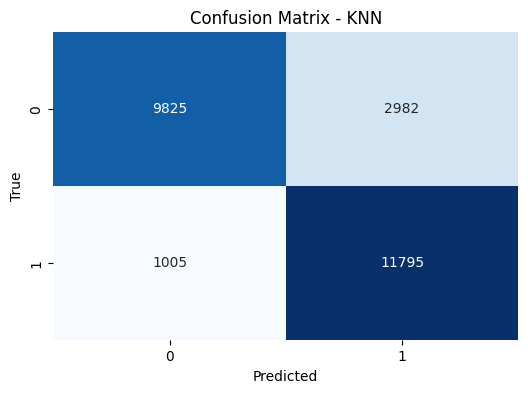


True Positives(TP) - Random Forest =  10081

True Negatives(TN) - Random Forest =  11806

False Positives(FP) - Random Forest =  2726

False Negatives(FN) - Random Forest =  994


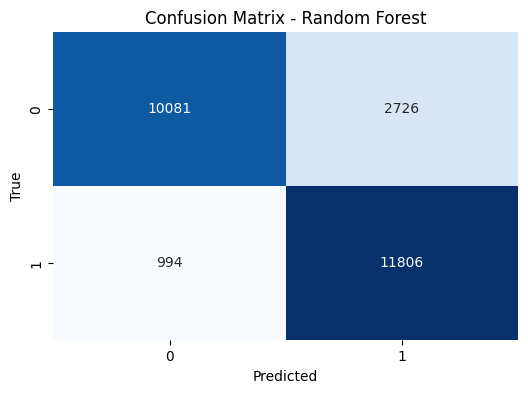


True Positives(TP) - SVM =  10010

True Negatives(TN) - SVM =  11783

False Positives(FP) - SVM =  2797

False Negatives(FN) - SVM =  1017


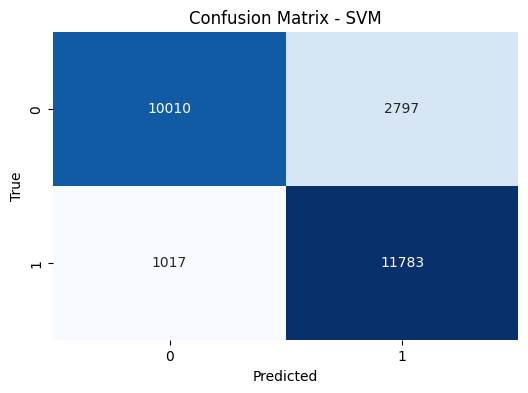


True Positives(TP) - Gaussian NB =  9765

True Negatives(TN) - Gaussian NB =  11611

False Positives(FP) - Gaussian NB =  3042

False Negatives(FN) - Gaussian NB =  1189


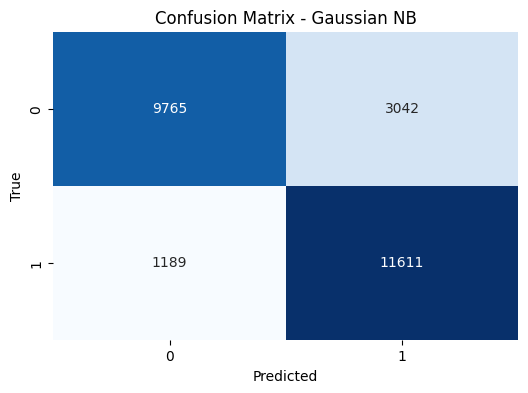


True Positives(TP) - Light GBM =  10217

True Negatives(TN) - Light GBM =  11582

False Positives(FP) - Light GBM =  2590

False Negatives(FN) - Light GBM =  1218


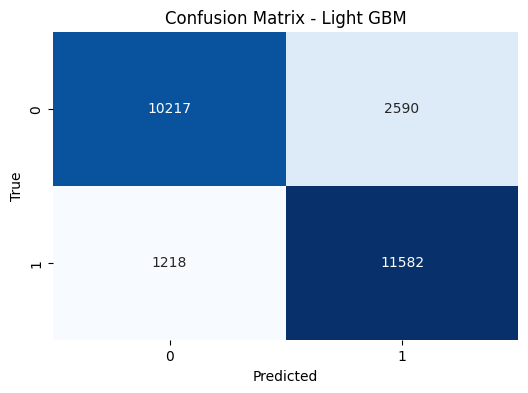


True Positives(TP) - MLP =  10057

True Negatives(TN) - MLP =  11723

False Positives(FP) - MLP =  2750

False Negatives(FN) - MLP =  1077


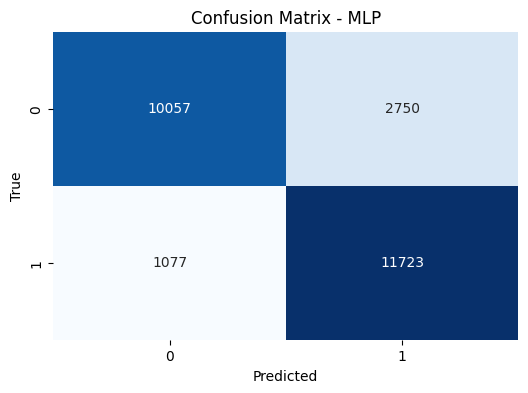

In [9]:
# Generating confusion matrix for each classifier  
classifiers = [knn, rf, svm, gnb, lgbm, mlp]
classifier_names = ['KNN', 'Random Forest', 'SVM', 'Gaussian NB', 'Light GBM', 'MLP']

for clf, name in zip(classifiers, classifier_names):
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    print(f'\nTrue Positives(TP) - {name} = ', cm[0,0])
    print(f'\nTrue Negatives(TN) - {name} = ', cm[1,1])
    print(f'\nFalse Positives(FP) - {name} = ', cm[0,1])
    print(f'\nFalse Negatives(FN) - {name} = ', cm[1,0])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()